# Diccionarios

Un diccionario es una estructura Clave=>Valor
<br>Por ejemplo en lugar de tener un listado de las notas de mis alumnos, podria tener un diccionario con la nota asignada al nombre de cada uno

## Estruuctura del diccionario

* Abre con: {
* Cierra con: }
* Los elementos se separan con comas
* Los elementos del diccionario tienen clave y valor
* La clave se escribe entre comillas preferentemente
* EL valor se escribe entre comillas solo si es un string
* Entre clave y valor va un ":" 

In [1]:
diccionario = {"ALUA":29.35 , "BBAR":120.85 , "BMA":265.2 , "BYMA":[290,299]}
type(diccionario)

dict

In [2]:
print(diccionario)

{'ALUA': 29.35, 'BBAR': 120.85, 'BMA': 265.2, 'BYMA': [290, 299]}


In [3]:
diccionario['AAPL']

KeyError: 'AAPL'

## El método get()

<br>
Dos Formas de Acceder a los valores de una clave de un diccionario

In [4]:
diccionario['BBAR']

120.85

In [5]:
diccionario.get('BBAR')

120.85

In [6]:
rta = diccionario['AAPL']
print(rta)

KeyError: 'AAPL'

In [7]:
rta = diccionario.get('AAPL')
print(rta)

None


Supongamos que sabemos que podria no estar el ticker buscado en el diccionario
<br>Para ello conviene usar el método get, ya que tiene un valor por default en caso que el indice buscado no se encuentre para evitar que tire error el programa, ese valor por default es <b>None</b> es decir un dato nulo pero como decía no me tira error

In [8]:
print(diccionario.get('FRAN'))

None


Asimismo puedo elegir el valor por default que me devuelva en caso de no encontrar el indice en el diccionario, es el segundo argumento que no es obligatorio

In [9]:
print(diccionario.get('FRAN',0))

0


## Keys(), values() e items()

<br>
Accedemos por separado a las Claves y Valores

In [10]:
keys = diccionario.keys()
print(keys)

dict_keys(['ALUA', 'BBAR', 'BMA', 'BYMA'])


In [11]:
values = diccionario.values()
print(values)

dict_values([29.35, 120.85, 265.2, [290, 299]])


In [12]:
values = list(diccionario.values())
print(values)

[29.35, 120.85, 265.2, [290, 299]]


Accedemos a los pares Clave=>Valor

In [13]:
items = diccionario.items()
print(items)

dict_items([('ALUA', 29.35), ('BBAR', 120.85), ('BMA', 265.2), ('BYMA', [290, 299])])


In [14]:
items = diccionario.items()
print(list(items)[0])

('ALUA', 29.35)


## Iterando un diccionario

In [15]:
for k in diccionario.keys():
    print(k)

ALUA
BBAR
BMA
BYMA


## La función zip()

In [16]:
tickers = ['ALUA','BBAR']
cantidades = [1,2]
diccio = dict(zip(a,p))
diccio

NameError: name 'a' is not defined

## De un diccionario a algo mas copado?

Supongamos que tenemos los montos de tenencias en cartera de esta fomra:

In [17]:
tickers = ['TSLA','AMZN','GOOGL','TLT','SHY','BTC']
montos = [12500, 5000, 10_500, 20_000, 7*10**3, 25e3]

Si quisiera la suma de montos, es facil:

In [18]:
sum(montos)

80000.0

Si quisiera los porcentajes?

Y si quiero el monto de TLT?

Y si quiero los 3 activos de mayor tenencia?

Y si quiero el primer decil, o el percentil 6 de mayor tenencia?

# DataFrames

In [19]:
import pandas as pd

In [20]:
cartera = pd.DataFrame(data=montos, index=tickers)
cartera.columns=['montos']
cartera

,montos
TSLA,12500.0
AMZN,5000.0
GOOGL,10500.0
TLT,20000.0
SHY,7000.0
BTC,25000.0


In [21]:
cartera = pd.DataFrame(index=tickers)
cartera['montos'] = montos
cartera

,montos
TSLA,12500.0
AMZN,5000.0
GOOGL,10500.0
TLT,20000.0
SHY,7000.0
BTC,25000.0


In [22]:
cartera['porcentajes'] = cartera.montos /cartera.montos.sum()
cartera

,montos,porcentajes
TSLA,12500.0,0.15625
AMZN,5000.0,0.06250
GOOGL,10500.0,0.13125
TLT,20000.0,0.25000
SHY,7000.0,0.08750
BTC,25000.0,0.31250


Se acuerdan si quiero los 3 mayores montos?

In [23]:
cartera.montos.sort_values(ascending=False).head(3).index

Index(['BTC', 'TLT', 'TSLA'], dtype='object')

# Datos de Mercado

In [24]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [25]:
import yfinance as yf

In [26]:
yf.download('AAPL', start='2010-01-01', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,6.565743,6.598660,6.533442,6.583586,493729600
2010-01-05,6.601736,6.632191,6.560205,6.594968,601904800
2010-01-06,6.594967,6.621116,6.483298,6.490066,552160000
2010-01-07,6.514060,6.521751,6.431000,6.478067,477131200
2010-01-08,6.469454,6.521751,6.431309,6.521136,447610800
...,...,...,...,...,...
2021-03-18,122.879997,123.180000,120.320000,120.529999,121229700
2021-03-19,119.900002,121.430000,119.680000,119.989998,185023200
2021-03-22,120.330002,123.870003,120.260002,123.389999,111912300


In [27]:
yf.download('AAPL', start='2010-01-01', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.583586,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.594968,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.490066,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.478067,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.521136,447610800
...,...,...,...,...,...,...
2021-03-18,122.879997,123.180000,120.320000,120.529999,120.529999,121229700
2021-03-19,119.900002,121.430000,119.680000,119.989998,119.989998,185023200
2021-03-22,120.330002,123.870003,120.260002,123.389999,123.389999,111912300


In [28]:
yf.download('AAPL', start='2021-01-01', interval='5m', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: 5m data not available for startTime=1609470000 and endTime=1616604270. The requested range must be within the last 60 days.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [29]:
tickers = ['AAPL', 'FB', 'AMZN', 'GOOGL', 'NFLX', 'QQQ', 'SQQQ']

data = yf.download(tickers, start='2020-01-01', auto_adjust=True)['Close']
data

[*********************100%***********************]  7 of 7 completed


,AAPL,AMZN,FB,GOOGL,NFLX,QQQ,SQQQ
Date,,,,,,,
2020-01-02,74.333511,1898.010010,209.779999,1368.680054,329.809998,214.665176,106.196915
2020-01-03,73.610840,1874.969971,208.669998,1361.520020,325.899994,212.698853,109.038803
2020-01-06,74.197395,1902.880005,212.600006,1397.810059,335.829987,214.069321,106.944778
2020-01-07,73.848442,1906.859985,213.059998,1395.109985,330.750000,214.039520,106.994637
2020-01-08,75.036385,1891.969971,215.220001,1405.040039,339.260010,215.648300,104.601471
...,...,...,...,...,...,...,...
2021-03-18,120.529999,3027.989990,278.619995,2021.339966,504.790009,311.646393,14.190000
2021-03-19,119.989998,3074.959961,290.109985,2026.959961,512.179993,312.745026,14.010000
2021-03-22,123.389999,3110.870117,293.540009,2030.689941,523.109985,318.609985,13.250000


## De DataFrame a excel

In [30]:
data.to_excel('FAANGs.xlsx')

## De Excel a DataFrame

In [31]:
import pandas as pd

data = pd.read_excel('FAANGs.xlsx')
data

,Date,AAPL,AMZN,FB,GOOGL,NFLX,QQQ,SQQQ
0,2020-01-02,74.333511,1898.010010,209.779999,1368.680054,329.809998,214.665176,106.196915
1,2020-01-03,73.610840,1874.969971,208.669998,1361.520020,325.899994,212.698853,109.038803
2,2020-01-06,74.197395,1902.880005,212.600006,1397.810059,335.829987,214.069321,106.944778
3,2020-01-07,73.848442,1906.859985,213.059998,1395.109985,330.750000,214.039520,106.994637
4,2020-01-08,75.036385,1891.969971,215.220001,1405.040039,339.260010,215.648300,104.601471
...,...,...,...,...,...,...,...,...
304,2021-03-18,120.529999,3027.989990,278.619995,2021.339966,504.790009,311.646393,14.190000
305,2021-03-19,119.989998,3074.959961,290.109985,2026.959961,512.179993,312.745026,14.010000
306,2021-03-22,123.389999,3110.870117,293.540009,2030.689941,523.109985,318.609985,13.250000
307,2021-03-23,122.540001,3137.500000,290.630005,2041.329956,535.090027,317.220001,13.430000


## Seteo de indice del dataframe

In [32]:
data.set_index('Date')

,AAPL,AMZN,FB,GOOGL,NFLX,QQQ,SQQQ
Date,,,,,,,
2020-01-02,74.333511,1898.010010,209.779999,1368.680054,329.809998,214.665176,106.196915
2020-01-03,73.610840,1874.969971,208.669998,1361.520020,325.899994,212.698853,109.038803
2020-01-06,74.197395,1902.880005,212.600006,1397.810059,335.829987,214.069321,106.944778
2020-01-07,73.848442,1906.859985,213.059998,1395.109985,330.750000,214.039520,106.994637
2020-01-08,75.036385,1891.969971,215.220001,1405.040039,339.260010,215.648300,104.601471
...,...,...,...,...,...,...,...
2021-03-18,120.529999,3027.989990,278.619995,2021.339966,504.790009,311.646393,14.190000
2021-03-19,119.989998,3074.959961,290.109985,2026.959961,512.179993,312.745026,14.010000
2021-03-22,123.389999,3110.870117,293.540009,2030.689941,523.109985,318.609985,13.250000


In [33]:
data

,Date,AAPL,AMZN,FB,GOOGL,NFLX,QQQ,SQQQ
0,2020-01-02,74.333511,1898.010010,209.779999,1368.680054,329.809998,214.665176,106.196915
1,2020-01-03,73.610840,1874.969971,208.669998,1361.520020,325.899994,212.698853,109.038803
2,2020-01-06,74.197395,1902.880005,212.600006,1397.810059,335.829987,214.069321,106.944778
3,2020-01-07,73.848442,1906.859985,213.059998,1395.109985,330.750000,214.039520,106.994637
4,2020-01-08,75.036385,1891.969971,215.220001,1405.040039,339.260010,215.648300,104.601471
...,...,...,...,...,...,...,...,...
304,2021-03-18,120.529999,3027.989990,278.619995,2021.339966,504.790009,311.646393,14.190000
305,2021-03-19,119.989998,3074.959961,290.109985,2026.959961,512.179993,312.745026,14.010000
306,2021-03-22,123.389999,3110.870117,293.540009,2030.689941,523.109985,318.609985,13.250000
307,2021-03-23,122.540001,3137.500000,290.630005,2041.329956,535.090027,317.220001,13.430000


## Inplace

In [34]:
data.set_index('Date', inplace=True)

In [35]:
data

,AAPL,AMZN,FB,GOOGL,NFLX,QQQ,SQQQ
Date,,,,,,,
2020-01-02,74.333511,1898.010010,209.779999,1368.680054,329.809998,214.665176,106.196915
2020-01-03,73.610840,1874.969971,208.669998,1361.520020,325.899994,212.698853,109.038803
2020-01-06,74.197395,1902.880005,212.600006,1397.810059,335.829987,214.069321,106.944778
2020-01-07,73.848442,1906.859985,213.059998,1395.109985,330.750000,214.039520,106.994637
2020-01-08,75.036385,1891.969971,215.220001,1405.040039,339.260010,215.648300,104.601471
...,...,...,...,...,...,...,...
2021-03-18,120.529999,3027.989990,278.619995,2021.339966,504.790009,311.646393,14.190000
2021-03-19,119.989998,3074.959961,290.109985,2026.959961,512.179993,312.745026,14.010000
2021-03-22,123.389999,3110.870117,293.540009,2030.689941,523.109985,318.609985,13.250000


## Magia I: pct_change()

In [36]:
data.pct_change()

,AAPL,AMZN,FB,GOOGL,NFLX,QQQ,SQQQ
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,-0.005291,-0.005231,-0.011855,-0.009160,0.026761
2020-01-06,0.007968,0.014886,0.018834,0.026654,0.030469,0.006443,-0.019204
2020-01-07,-0.004703,0.002092,0.002164,-0.001932,-0.015127,-0.000139,0.000466
2020-01-08,0.016086,-0.007809,0.010138,0.007118,0.025729,0.007516,-0.022367
...,...,...,...,...,...,...,...
2021-03-18,-0.033905,-0.034359,-0.018978,-0.029238,-0.037469,-0.030631,0.091538
2021-03-19,-0.004480,0.015512,0.041239,0.002780,0.014640,0.003525,-0.012685
2021-03-22,0.028336,0.011678,0.011823,0.001840,0.021340,0.018753,-0.054247


## Magia II: rolling()

In [37]:
data.rolling(3).mean()

,AAPL,AMZN,FB,GOOGL,NFLX,QQQ,SQQQ
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,74.047249,1891.953328,210.350001,1376.003377,330.513326,213.811117,107.393499
2020-01-07,73.885559,1894.903320,211.443334,1384.813354,330.826660,213.602564,107.659406
2020-01-08,74.360741,1900.569987,213.626668,1399.320028,335.279999,214.585714,106.180295
...,...,...,...,...,...,...,...
2021-03-18,123.620000,3085.193359,280.636668,2062.483276,517.753347,317.771983,13.450000
2021-03-19,121.760000,3079.559977,284.246663,2043.506632,513.803335,315.295125,13.733333
2021-03-22,121.303332,3071.273356,287.423330,2026.329956,513.359996,314.333801,13.816667


## Magia III: matriz de covarianzas, correlacion, etc..

In [38]:
data.pct_change().cov()

,AAPL,AMZN,FB,GOOGL,NFLX,QQQ,SQQQ
AAPL,0.000792,0.000454,0.000590,0.000480,0.000453,0.000540,-0.001595
AMZN,0.000454,0.000535,0.000437,0.000364,0.000462,0.000392,-0.001160
FB,0.000590,0.000437,0.000764,0.000508,0.000457,0.000478,-0.001417
GOOGL,0.000480,0.000364,0.000508,0.000560,0.000377,0.000437,-0.001291
NFLX,0.000453,0.000462,0.000457,0.000377,0.000870,0.000402,-0.001181
QQQ,0.000540,0.000392,0.000478,0.000437,0.000402,0.000458,-0.001346
SQQQ,-0.001595,-0.001160,-0.001417,-0.001291,-0.001181,-0.001346,0.003969


In [39]:
data.pct_change().corr(method='pearson')

,AAPL,AMZN,FB,GOOGL,NFLX,QQQ,SQQQ
AAPL,1.000000,0.697945,0.757745,0.720660,0.545726,0.895776,-0.899544
AMZN,0.697945,1.000000,0.683366,0.664386,0.677008,0.791807,-0.796281
FB,0.757745,0.683366,1.000000,0.776866,0.560196,0.807169,-0.813334
GOOGL,0.720660,0.664386,0.776866,1.000000,0.539990,0.862266,-0.865385
NFLX,0.545726,0.677008,0.560196,0.539990,1.000000,0.636317,-0.635470
QQQ,0.895776,0.791807,0.807169,0.862266,0.636317,1.000000,-0.997878
SQQQ,-0.899544,-0.796281,-0.813334,-0.865385,-0.635470,-0.997878,1.000000


In [40]:
data.pct_change().corr(method='kendall')

,AAPL,AMZN,FB,GOOGL,NFLX,QQQ,SQQQ
AAPL,1.000000,0.513347,0.501290,0.485427,0.397056,0.697661,-0.700227
AMZN,0.513347,1.000000,0.515081,0.491180,0.511951,0.622446,-0.624758
FB,0.501290,0.515081,1.000000,0.584035,0.391429,0.568848,-0.573571
GOOGL,0.485427,0.491180,0.584035,1.000000,0.356783,0.624053,-0.624843
NFLX,0.397056,0.511951,0.391429,0.356783,1.000000,0.470536,-0.469631
QQQ,0.697661,0.622446,0.568848,0.624053,0.470536,1.000000,-0.977019
SQQQ,-0.700227,-0.624758,-0.573571,-0.624843,-0.469631,-0.977019,1.000000


## Magia IV: Estadística descriptiva

In [41]:
data.pct_change().std() * (250**0.5)

AAPL     0.445108
AMZN     0.365654
FB       0.437144
GOOGL    0.374307
NFLX     0.466295
QQQ      0.338516
SQQQ     0.996140
dtype: float64

que mas?

## Magia V: Conversiones, ej. dataFrame a diccionario

In [42]:
volatilidades = (data.pct_change().std() * (250**0.5)).to_dict()

In [43]:
volatilidades

{'AAPL': 0.4451078315000331,
 'AMZN': 0.365653577853201,
 'FB': 0.43714397511020986,
 'GOOGL': 0.3743067400897252,
 'NFLX': 0.4662948037730501,
 'QQQ': 0.3385159164724522,
 'SQQQ': 0.9961401497911267}

In [44]:
volatilidades['FB']

0.43714397511020986

## Magia VI: Graficos rápidos

<AxesSubplot:>

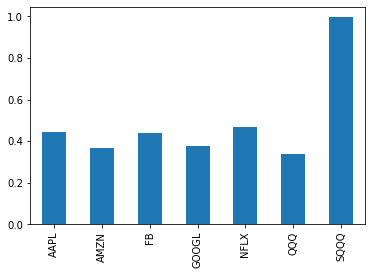

In [45]:
(data.pct_change().std() * (250**0.5)).plot(kind='bar')

<AxesSubplot:xlabel='Date'>

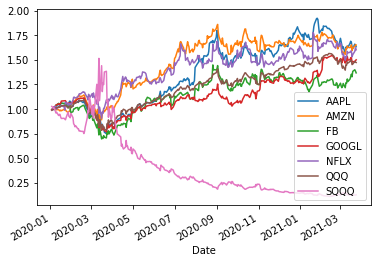

In [46]:
(data.pct_change()+1).cumprod().plot()

<AxesSubplot:>

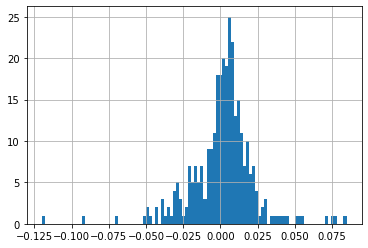

In [47]:
data.QQQ.pct_change().hist(bins=100)

# Excepciones

In [48]:
a = 10
b = 20

c = a / b

print(c)

0.5


In [49]:
a = 10
b = 0

c = a / b


print('Hola ya terminé el paso de la division')
print(c)


ZeroDivisionError: division by zero

In [ ]:
a = 10
b = 0

try:
    c = a / b
except:
    print('no pude hacer la division')
    c = None

print('Hola ya terminé el paso de la division')
print(c)


In [50]:
a = 10
b = 0
c = None

try:
    c = a / b
except:
    c = 'No se puede dividir por cero'
finally:
    print('Por aca pasa siempre')


print(c)

Por aca pasa siempre
No se puede dividir por cero


# Operadores Lógicos

Antes de la sentencia IF veamos las condiciones por separado

Una condicion escrita devuelve un return, es decir que pueda darle salida a una condicion y meterle ese return a una variable

In [51]:
COME = 2.75

COME < 3

True

In [52]:
COME == 3

False

In [53]:
resultado_pregunta = COME == 3

In [54]:
resultado_pregunta

False

In [55]:
pregunta = COME > 3
print(pregunta)

False


In [56]:
print(COME > 3, COME == 3, COME < 3)

False False True


In [57]:
come_menor_3 = COME < 3

In [58]:
come_menor_3

True

In [59]:
portafolio = ['AAPL', 'FB', 'GOOGL', 'GGAL']

'GGAL' in portafolio

True

In [60]:
accion = 'YPF'

accion in portafolio

False

In [61]:
COME == 3

False

In [62]:
come_igual_3 = COME ==3

In [63]:
come_igual_3

False

Comparadores:
    
    * ==  Es igual a ?
    * !=  Es distinto a?
    * > 
    * >=
    * <
    * <=

    * is
    * is not
    * in
    * not in

In [64]:
listado = ["GGAL","PAMP","YPFD","CEPU","EDN","LOMA","CRES"]
listado

['GGAL', 'PAMP', 'YPFD', 'CEPU', 'EDN', 'LOMA', 'CRES']

In [65]:
ticker = "GGAL"

ticker not in listado

False

## RECUERDEN


    * Un signo igual solo es una asignacion
    * Dos signos igual es una pregunta

# Sentencia IF

Los condicionales son los que definen "ramas" del flujo, véanlas como "bifurcaciones"

Obviamente la sentencia IF lo que hace es preguntar si se cumple o no una condicion, en caso afirmativo ejecuta la línea que sigue despues de los DOS PUNTOS, caso negativo termina ahí si no hay else, pero si hubiera un else, ejecuta la línea o líneas que siguen despues de os DOS PUNTOS del else

## Concepto de la indentación

In [70]:
COME = 3

if COME > 1:
    print('entro por el si')
else:
    print('entro por el no')

entro por el si


In [68]:
accion = "AAPL"
cartera = ["AAPL","AMZN","FB"]

if accion in cartera:
    print(f"{accion} está en la cartera")

else:
    print(F"{accion} NO está en la cartera")

AAPL está en la cartera


También se puede usar el operador con el <b>not</b> adelante como cualquier otro operador

In [71]:
accion = "GGAL"
cartera = ["AAPL","AMZN","FB"]

if accion not in cartera:
    print(f"Ojo que {accion} NO está en la cartera")
else:
    pass
    # ojo poner aca tal cosa


Ojo que GGAL NO está en la cartera


# Concatenados / Anidados

<img src="imagenes/decisiones.png" style="width:150%;float:left;margin-left:-50px;margin-top:-20px;">

<img src="imagenes/decisiones.png" style="float:left;width:90%">

## Ejemplo IF Anidado

In [72]:
# Tarea arregla este script por si el usuario manda cualquier fruta por teclado

resistencias = [7,10,15,20]
precio = float(input("Ingresar el precio: "))

if precio < resistencias[0]:
    print("Resistencia a vencer: ", resistencias[0])
    
elif precio < resistencias[1]:
    print("Resistencia a vencer: ", resistencias[1])
    
elif precio < resistencias[2]:
    print("Resistencia a vencer: ", resistencias[2])
    
elif precio < resistencias[3]:
    print("Resistencia a vencer: ", resistencias[3])  
    
else:
    print("Estamos en máximos históricos")
    


Ingresar el precio: 8
Resistencia a vencer:  10


EJERCICIO: Hacer esto mismo pero con un FOR en lugar de los IFs anidados

## Hardcodeando

In [73]:
precio = 10

if precio < resistencias[0]:
    print("Resistencia a vencer: ", resistencias[0])

if (precio < resistencias[1]) & (precio >= resistencias[0]):
    print("Resistencia a vencer: ", resistencias[1])

if (precio < resistencias[2]) & (precio >= resistencias[1]):
    print("Resistencia a vencer: ", resistencias[2])

if (precio < resistencias[3]) & (precio >= resistencias[2]):
    print("Resistencia a vencer: ", resistencias[3])

if precio > resistencias[3]:
    print("Estamos en maximos historicos")


Resistencia a vencer:  15


## Ejemplo IF anidado

In [74]:
precio = float(input("Ingresar precio actual: "))
stopLoss = 95
takeProfit = 110

if precio > stopLoss:
    if precio < takeProfit:
        print("Hold")
    else:
        print("Salida por take Profit")
else:
    print("Salida por Stop Loss")

Ingresar precio actual: 96
Hold


# Bucles FOR/WHILE

## FOR

In [75]:
for i in [0,1,2,3,4]:
    print(i*3+2)

2
5
8
11
14


In [76]:
for i in [0,1,2,3,4]:
    print(i)
else:
    print('Terminé')

0
1
2
3
4
Terminé


## WHILE

In [77]:
i = 1
while i <= 4 :
    print(i)
    i += 1     # es lo mismo que:  i = i + 1
    
    
print(f'ya termine ahora i vale {i}')

1
2
3
4
ya termine ahora i vale 5


In [78]:
i = 1
while i <= 4 :
    print(i)
    i += 1
else:
    print('terminé')

1
2
3
4
terminé


## Ejemplo de estadistica

Cual es la probabilidad de estar mas de 2 desvios afuera en una normal estandar?

In [79]:
import numpy as np

variaciones = np.random.normal(0,1,1000)

variaciones[:10]

array([ 1.24945525, -0.86668022,  1.70248426, -1.71705931, -0.62025832,
        0.47630942,  0.10848062,  0.74387064,  0.35084528,  0.63563989])

In [80]:
import numpy as np

variaciones = np.random.normal(0,1,1000)

for variacion in variaciones:
    if abs(variacion) > 2:
        print(round(variacion,2), end=' ')

2.14 -3.36 -2.1 2.43 2.45 2.01 2.25 -2.93 -2.53 -2.12 2.41 -2.14 -2.09 2.46 -2.63 -2.25 -2.01 2.01 -2.08 -2.39 2.29 2.31 2.8 -2.22 -2.75 3.13 -2.45 2.23 -2.45 -2.27 2.21 2.88 -2.46 -2.01 -2.11 -2.16 -2.57 2.53 -2.0 2.28 -2.42 2.03 -2.05 

In [85]:
variaciones = np.random.normal(0,1,1000)
outliers = []

for variacion in variaciones:
    if abs(variacion) > 2:
        outliers.append(round(variacion,2))
        
len(outliers)

56

## Un FOR adentro de otro?

In [88]:
for i in range(10):
    variaciones = np.random.normal(0,1,10**6)
    outliers = []
    for variacion in variaciones:
        if abs(variacion) > 2:
            outliers.append(round(variacion,2))
    print(len(outliers))

45286
45406
45339
45572
45232
45635
45846
45527
45592
45576


## Listas por comprensión

### Ejemplo hiper basico

In [89]:
lista = []
for i in range(0,11):
    lista.append(i*7)
lista

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70]

In [90]:
lista2 = [x*7 for x in range(0,11)]
lista2

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70]

# Ciclos infinitos

## Corte por Break

In [93]:
import time, datetime

i = 0
while True:
    print("Cada un segundo imprimo fecha/hora: ", datetime.datetime.now())
    time.sleep(1)
    i += 1
    if i>5:
        break
        print('Salida por break')

Cada un segundo imprimo fecha/hora:  2021-03-24 14:01:24.239425
Cada un segundo imprimo fecha/hora:  2021-03-24 14:01:25.242944
Cada un segundo imprimo fecha/hora:  2021-03-24 14:01:26.247957
Cada un segundo imprimo fecha/hora:  2021-03-24 14:01:27.259128
Cada un segundo imprimo fecha/hora:  2021-03-24 14:01:28.267815
Cada un segundo imprimo fecha/hora:  2021-03-24 14:01:29.274966


## Corte por teclado

In [94]:
import time, datetime

while True:
    print("Cada un segundo imprimo", datetime.datetime.now())
    time.sleep(1)
    

Cada un segundo imprimo 2021-03-24 14:01:31.324473
Cada un segundo imprimo 2021-03-24 14:01:32.330854
Cada un segundo imprimo 2021-03-24 14:01:33.332323
Cada un segundo imprimo 2021-03-24 14:01:34.343925


KeyboardInterrupt: 